In [240]:
#!pip install yfinance
#!pip install pandas
#!pip install requests
#!pip install bs4
#!pip install plotly

In [241]:
import pandas as pd
import yfinance as yf
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
tesla = yf.Ticker("TSLA")

In [243]:
tesla_data = tesla.history(period="max")

In [244]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [245]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [246]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [247]:
html_data = requests.get(url).text

In [248]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[]

In [249]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Ensure there is more than one <tbody> element before accessing the second one
tbody_elements = soup.find_all("tbody")
if len(tbody_elements) > 1:
    for row in tbody_elements[1].find_all("tr"):
        col = row.find_all("td")
        if len(col) > 1:  # Ensure there are at least two columns
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace("$", "").replace(",", "")
            
            # Append data to DataFrame
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
else:
    print("Expected second <tbody> element not found. Check the HTML structure.")

Expected second <tbody> element not found. Check the HTML structure.


In [250]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [251]:
tesla_revenue.tail()

,Date,Revenue


In [252]:
gamestop = yf.Ticker("GME")

In [253]:
gamestop_data = gamestop.history(period="max")

In [254]:
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [255]:
gamestop = yf.Ticker("GME")

In [256]:
gamestop_data = gamestop.history(period="max")

In [257]:
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [258]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

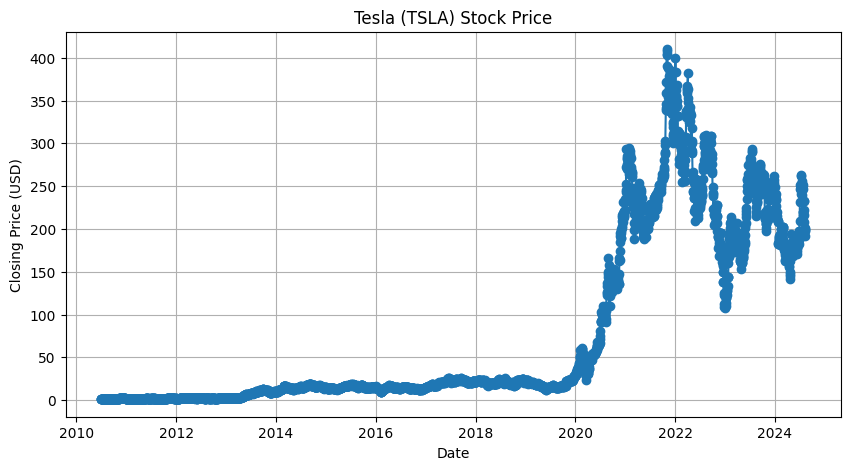

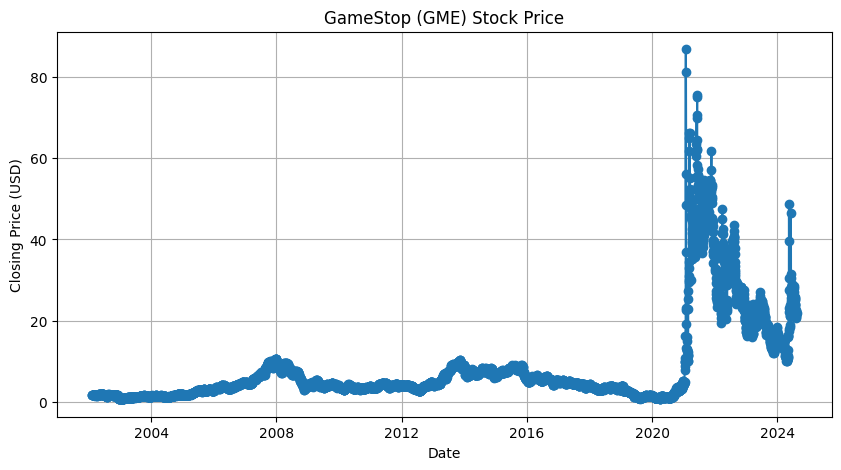

In [259]:
import matplotlib.pyplot as plt

# Assuming tesla_data and gamestop_data are already fetched and available as DataFrames

# Plot Tesla's stock data
plt.figure(figsize=(10, 5))
plt.plot(tesla_data['Date'], tesla_data['Close'], marker='o')
plt.title('Tesla (TSLA) Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

# Plot GameStop's stock data
plt.figure(figsize=(10, 5))
plt.plot(gamestop_data['Date'], gamestop_data['Close'], marker='o')
plt.title('GameStop (GME) Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

In [260]:
make_graph(gamestop_data, gme_revenue, 'GameStop')

NameError: name 'gme_revenue' is not defined